##### 12-Sept-21

## Automobile Dataset Analysis

This Automobile dataset comprises of multiple characetistics of several automobiles.  
In this notebook, we will draw meaningful inferences that will give us an insight into the autombile industry.

Content Overview
   1. Data Cleaning
   2. Visualization
   3. Model Building

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('G:\Datasets\Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### 
### Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From above, it seems there are no null values.   
However, from df.head() we have seen there are values with '?' symbol amidst them.    
We will need to impute those values.

We also notice that several features which are supposed to be numeric (such as normalized-losses,  price, horsepower, etc) are object type.  
This most likely means they too have '?' symbol within its values.

Lets check the normalized-losses object variable a bit more closely to confirm our suspicion.

In [4]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
128     6
134     6
95      5
94      5
168     5
74      5
102     5
65      5
85      5
103     5
148     4
118     4
93      4
106     4
122     4
101     3
137     3
125     3
83      3
115     3
154     3
89      2
108     2
192     2
197     2
119     2
188     2
87      2
153     2
129     2
164     2
110     2
113     2
81      2
158     2
145     2
194     2
142     1
231     1
78      1
121     1
90      1
256     1
107     1
77      1
186     1
98      1
Name: normalized-losses, dtype: int64

As we see, there is '?' symbol within the column values.  
We will need to replace it with null value at the moment.  
Why with null value ?  
Because only then we can convert it to numerical type variable,  
and perform statistical operations on it like calculating mean, mode, median etc.  
Using those values, we can impute the missing data.

In [5]:
df = df.replace('?', np.nan)
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

From above code, we have replaced '?' with null value in the entire dataframe.  
Next we check the dtypes of the variables.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Clearly, we need to convert some of the dtypes into their appropriate types.

In [7]:
df['normalized-losses'].astype(str).astype(float)

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

Instead of manually converting each mistyped variable to float, lets automate it using a loop.

In [8]:
for col in df.select_dtypes(include="object"):
    try:
        df[col] = df[col].astype(str).astype(float)
    except:
        pass

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

It looks like we have converted them all.  
But lets check it once to confirm.

In [10]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [11]:
df.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


From the above table, we see two variables that can be converted to numeric type.  
Let's check these variables first.

In [12]:
df[['num-of-doors']].value_counts()

num-of-doors
four            114
two              89
dtype: int64

In [13]:
df[['num-of-cylinders']].value_counts()

num-of-cylinders
four                159
six                  24
five                 11
eight                 5
two                   4
twelve                1
three                 1
dtype: int64

Clearly, these can be replaced with their respective numeric values.  
Let's replace them accordingly.

In [14]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.00,35.44,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
length,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
width,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
height,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.33,0.27,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.26,0.32,2.07,3.11,3.29,3.41,4.17


From the count column of the above table, we can see which columns have missing values.  
We will impute them one by one.

## Handling Null Values

First, we will find the correlation of each variable combination.  
This will enable us to decide which variable to compare with when handling null values.

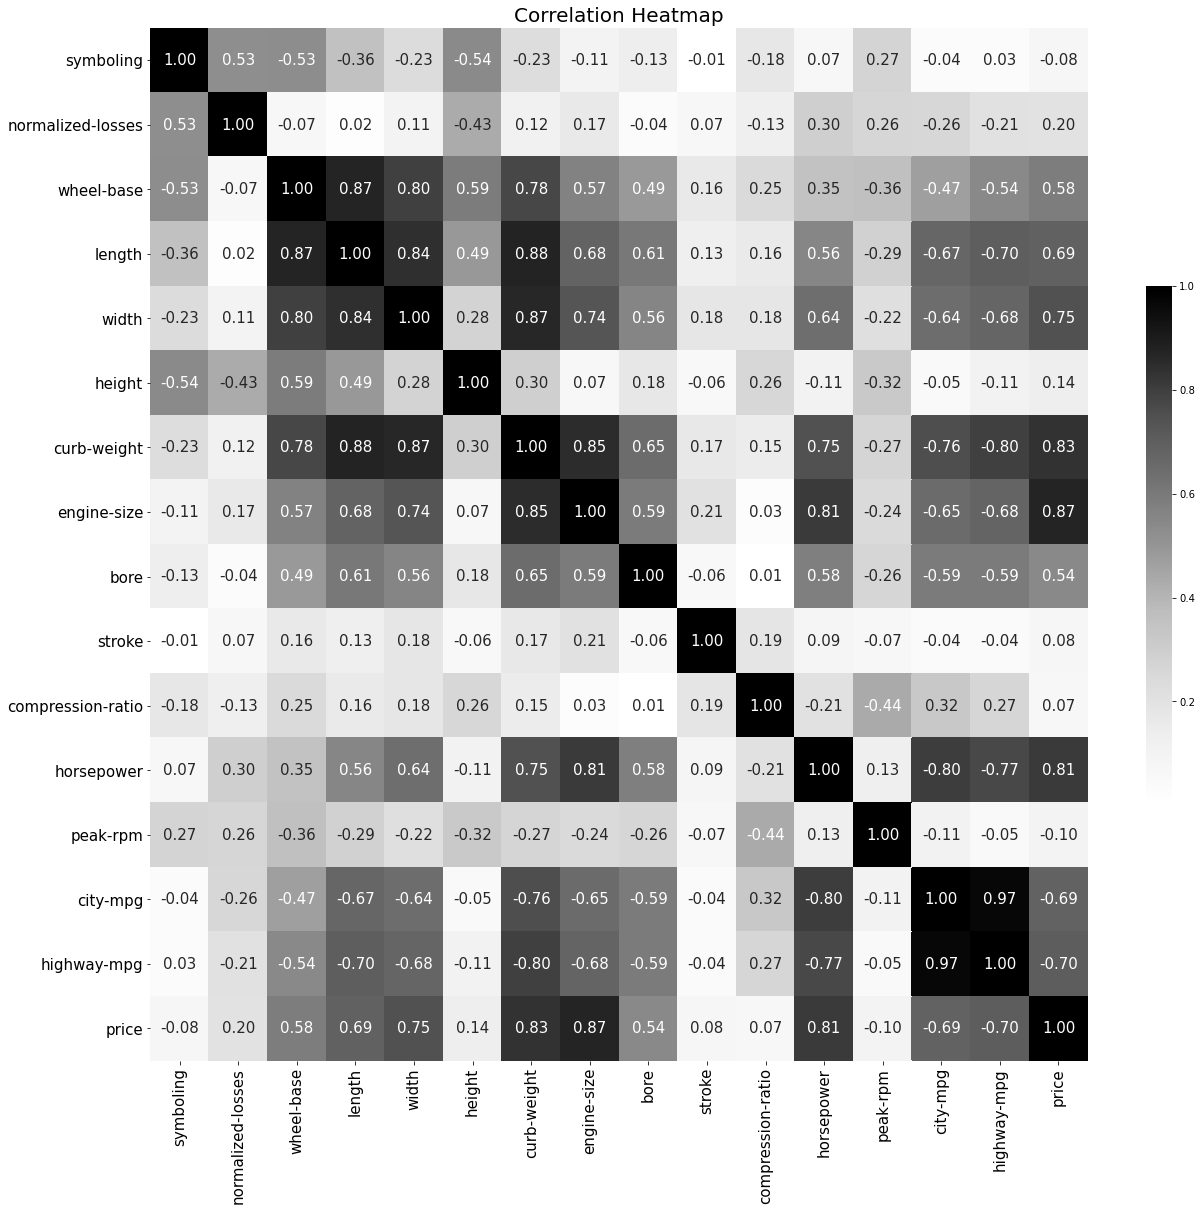

In [15]:
plt.figure(figsize = (21,19))
sns.heatmap(abs(df.corr()), annot=df.corr(), cmap='Greys', cbar_kws={"shrink": 0.5}, 
            fmt = '.2f', center = 0.5, annot_kws={"fontsize":15,'size':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Heatmap', fontsize=20);

There are a lot of inferences that one may make from the above chart.  
But we will put that on hold for now and relook at it once we have imputed the values.  

### Imputing by mode

#### First, we impute the num-of-doors column.  
We know logically that number of doors depends on body-style of car.  
That is, convertible and hardtop have two doors, while rest have 4.  
Let's check our understanding using graphs.

<AxesSubplot:xlabel='body-style', ylabel='count'>

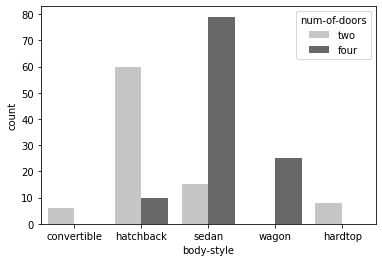

In [16]:
sns.countplot(data=df, x='body-style', hue='num-of-doors', palette = 'Greys')

From the above graph, we realize our understanding was partially correct.  
(This is exactly why we should always check our assumptions using visual representations.)  

In [17]:
df[df['num-of-doors'].isna()][['num-of-doors','body-style']]

,num-of-doors,body-style
27,NaN,sedan
63,NaN,sedan


As the body-style of these cars is sedan, we can impute num-of-doors as 4, as seen from above graphical representation.

In [18]:
df['num-of-doors'].fillna(4, inplace = True)

### Imputing by Visualizing

#### Second, we will impute the stroke and bore columns

In [19]:
df[df['stroke'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


'stroke' and 'bore' are dimensions of the cylinder in an automobile engine.  
That is, we may see some correlation between these variables.  
Lets check our understanding using graphical representation.

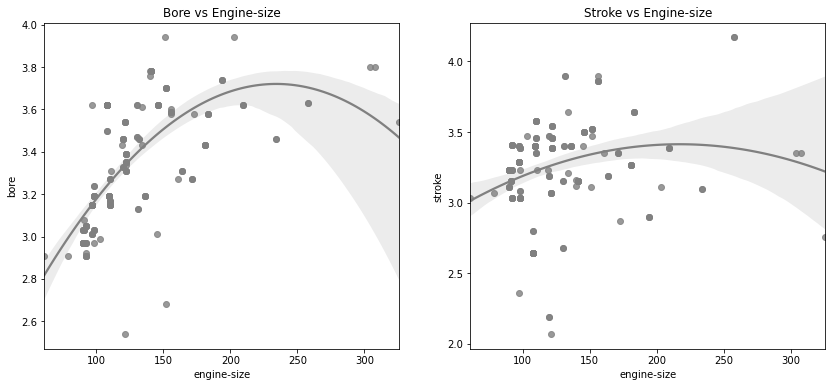

In [20]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='engine-size',y='bore', order = 2, color = 'grey')
plt.title('Bore vs Engine-size')
plt.subplot(1,2,2)
sns.regplot(data=df, x='engine-size',y='stroke', order = 2, color = 'grey')
plt.title('Stroke vs Engine-size');

Automating the above charts for reuse.

In [21]:
def plots_2(var, y1, y2, xintercept=0, yintercept1=0, yintercept2=0, vline=False, hline=False, n=1):
    plt.figure(figsize = (14,6))
    
    plt.subplot(1,2,1)
    sns.regplot(data=df, x=var,y=y1, order = n, color = 'grey')
    if vline==True:
        plt.axvline(x=xintercept, linestyle='--', color='blue') 
    if hline==True:
        plt.axhline(y=yintercept1, linestyle='--', color='red')        
    plt.title(f'{y1} vs {var}')
    
    plt.subplot(1,2,2)
    sns.regplot(data=df, x=var,y=y2, order = n, color = 'grey')
    if vline==True:
        plt.axvline(x=xintercept, linestyle='--', color='blue')
    if hline==True:
        plt.axhline(y=yintercept2, linestyle='--', color='red') 
    plt.title(f'{y2} vs {var}');

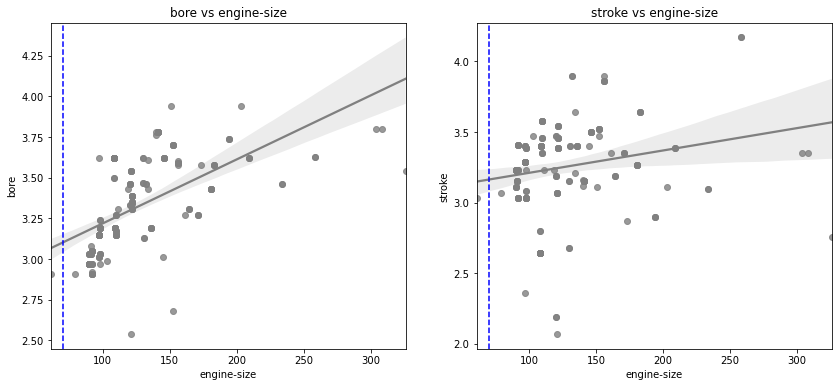

In [22]:
plots_2('engine-size','bore','stroke',70, vline=True)

Clearly, bore is linear to engine-size.  
We will impute the missing values of bore accordingly.  
While stroke seems to be concentrated at one point.  

In our missing data for stroke and bore, the engine size was at 70 and 80 units.  
Ideally we could use OLS to find the intercept and the slope to calculate the missing values.  
But here, as the count of missing values is less, we may eyeball estimate the value.   

Eyeballing those values in these graphs, it seems that  
For engine size = 70, bore = 3.0, stroke = 3.0  
For engine size = 80, bore = 3.0, stroke = 3.0

We will impute the values accordingly.

In [23]:
df['bore'].fillna(3, inplace = True)
df['stroke'].fillna(3, inplace = True)

In [24]:
def missingvalues():
    for col in df:
        if df[col].isna().sum()>0: print(col,':', df[col].isna().sum())

In [25]:
missingvalues()

normalized-losses : 41
horsepower : 2
peak-rpm : 2
price : 4


#### Thrid, we impute horsepower column

In [26]:
df[df['horsepower'].isna()][['horsepower','price','engine-size']]

,horsepower,price,engine-size
130,NaN,9295.0,132
131,NaN,9895.0,132


We see that for these null values, the engine-size is at 132 and price is between 9295 and 9895

In [27]:
# To check if it has been imputed successfully
df[['horsepower']].describe().round(1)

,horsepower
count,203.0
mean,104.3
std,39.7
min,48.0
25%,70.0
50%,95.0
75%,116.0
max,288.0


#### To replace missing values of horsepower
We must first check which variable does it more correspond to.  
From the heatmap we created earlier, we see that it correlates most with engine-size and price.  

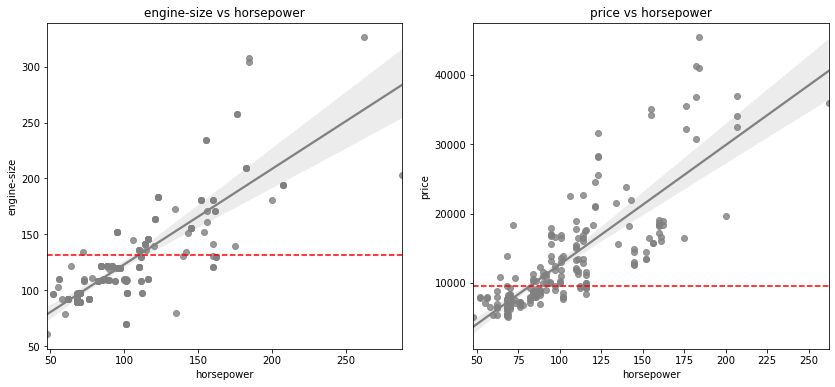

In [28]:
plots_2('horsepower','engine-size','price', hline=True, yintercept1=132, yintercept2=9500);

As engine-size is common for both, lets look at price a little deeper and extrapolate horsepower from there.

In [29]:
df[df['engine-size'].between(130,134)].sort_values(['engine-size'],ascending = True)[['engine-size','horsepower','price']]

,engine-size,horsepower,price
0,130,111.0,13495.0
1,130,111.0,16500.0
198,130,162.0,18420.0
199,130,162.0,18950.0
8,131,140.0,23875.0
9,131,160.0,NaN
130,132,NaN,9295.0
131,132,NaN,9895.0
66,134,72.0,18344.0
117,134,142.0,18150.0


In [30]:
df[df['price'].between(9000,10000)].sort_values(['price'],ascending = True)[['engine-size','horsepower','price']]

,engine-size,horsepower,price
38,110,86.0,9095.0
144,108,82.0,9233.0
162,98,70.0,9258.0
87,110,116.0,9279.0
88,110,116.0,9279.0
130,132,NaN,9295.0
165,98,112.0,9298.0
187,97,68.0,9495.0
166,98,112.0,9538.0
100,120,97.0,9549.0


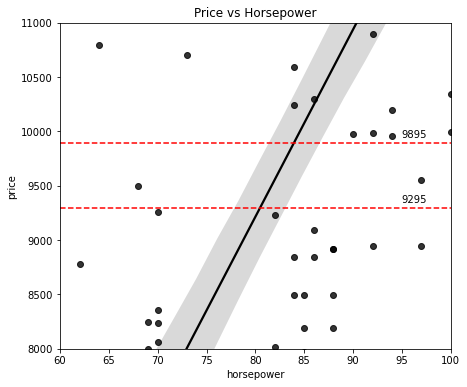

In [31]:
plt.figure(figsize=(7,6))
sns.regplot(data=df, x='horsepower', y='price', color='black')
plt.ylim(8000, 11000)
plt.xlim(60,100)
plt.axhline(y=9295, linestyle='--', color='red', clip_box='9295')
plt.text(95,9295+50,'9295')
plt.axhline(y=9895, linestyle='--', color='red')
plt.text(95,9895+50,'9895')
plt.title("Price vs Horsepower");

Eyeballing the above graph, we can estimate the missing horsepower values  
For observation with price 9295, the horsepower is around 80  
For observation with price 9895, the horsepower is around 83

#### Note: Please note that this eyeballing technique is used only because 
 1. we have just 205 observations. 
 2. the number of missing values are very low (2 here)
 
When observations are much larger, we may use mode or median instead

In [32]:
df[df['price'].between(9000,10000)]['horsepower'].mode()

0    116.0
dtype: float64

In [33]:
df['horsepower'].iloc[130] = 80
df['horsepower'].iloc[131] = 83

Now lets see which other columns have missing values that we need to impute.

In [34]:
missingvalues()

normalized-losses : 41
peak-rpm : 2
price : 4


#### Imputing Price column

In [35]:
df[df['price'].isna()][['make','horsepower','price','engine-size']]

,make,horsepower,price,engine-size
9,audi,160.0,NaN,131
44,isuzu,70.0,NaN,90
45,isuzu,70.0,NaN,90
129,porsche,288.0,NaN,203


We know from our understanding that price of a car depends on two major factors.  
First, the brand (make). Second, the performance (engine).  
Lets check our assumption through visual representation.

In [36]:
def singlecorrtable(col):
    plt.figure(figsize=(1,10))
    df_price_corr = df[df.columns].corr()[[col]].sort_values(col)
    sns.heatmap(abs(df_price_corr), annot=df_price_corr, cmap='Greys', cbar=False, annot_kws={"fontsize":12})
    plt.xticks(fontsize=12);

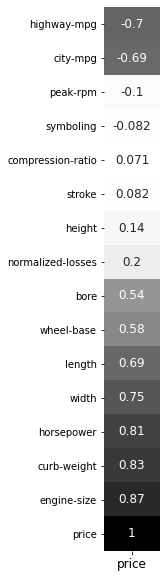

In [37]:
singlecorrtable('price')

We see that engine-size, curb-weight and horsepower are the highest impacters of Price  
Lets look at engine-size and horsepower as curb-weight are highly correlated

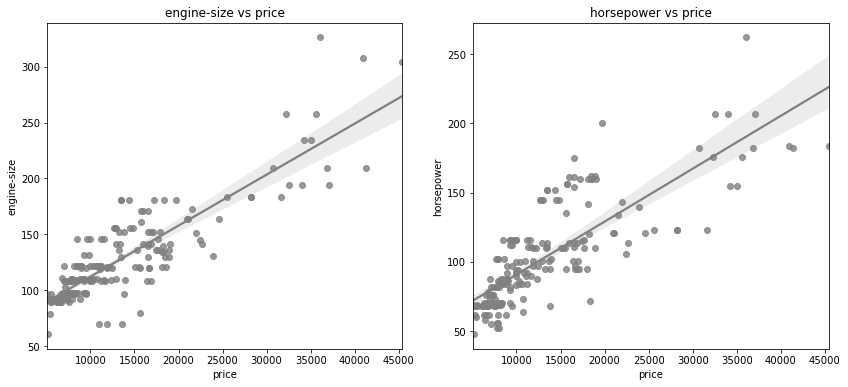

In [38]:
plots_2('price','engine-size','horsepower')

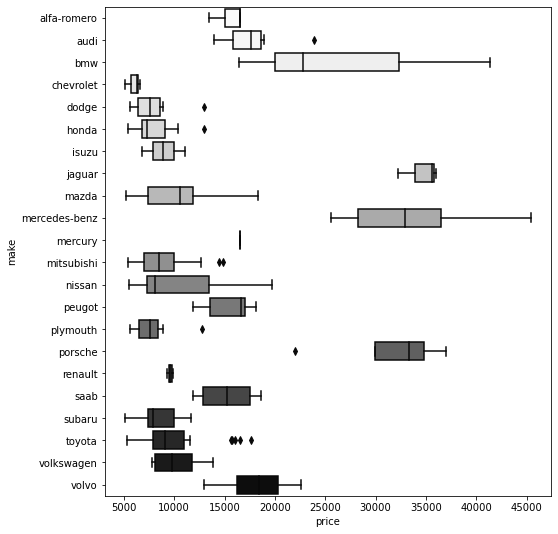

In [39]:
plt.figure(figsize = (8,9))
sns.boxplot(data=df, y='make', x='price',palette='Greys');

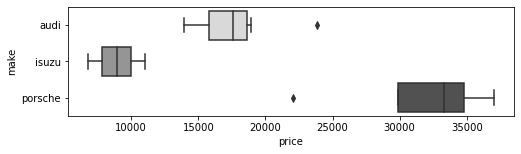

In [40]:
df_3 = df[df['make'].isin(['audi','isuzu','porsche'])]
plt.figure(figsize=(8,2))
sns.boxplot(data=df_3, y="make", x="price", palette='Greys');

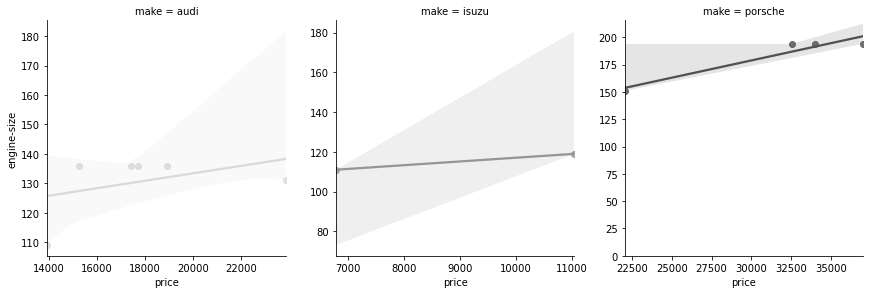

In [41]:
# Lets look at the price/horsepower variation with respect to the make
sns.lmplot(data=df_3,
           x='price',
           y='engine-size',
           hue='make',
           col_wrap = 4,
           col='make',
           height = 4, 
           sharex = False,
           sharey = False,
           palette='Greys')
plt.ylim(ymin=0);

The above charts certainly give us a better picture of the data distribution of price.

Lets look at the missing data of price column again, but this time with just horespower and make.

From above we can estimate,    
- for an Audi with horsepower 160, the price can be around 25000  
- for an isuzu with horsepower 70, the price can be around 7000  
- for a  porsche with horsepower 288, the price can be around 375000

Lets impute the missing values accordingly

In [42]:
df[df['price'].isna()][['make','horsepower','price']]

,make,horsepower,price
9,audi,160.0,NaN
44,isuzu,70.0,NaN
45,isuzu,70.0,NaN
129,porsche,288.0,NaN


From above we can estimate,    
- for an Audi with horsepower 160, the price can be around 25000  
- for an isuzu with horsepower 70, the price can be around 7000  
- for a  porsche with horsepower 288, the price can be around 375000

Lets impute the missing values accordingly

In [43]:
df['price'] = df['price'].fillna(pd.Series(np.where(df['make'] == 'audi', 25000, 
                                                    np.where(df['make']=='isuzu', 7000,
                                                            np.where(df['make']=='porsche',37500, df['price'].mean())))))


In [44]:
# Checking if the above has taken into effect
df[df['price'].isna()][['make','horsepower','price']]

,make,horsepower,price


In [45]:
# Checking which columns still have missing fields
for col in df:
    if df[col].isna().sum()>0: print(col,'\t', df[col].isna().sum())

normalized-losses 	 41
peak-rpm 	 2


#### Fifth, we impute Peak RPM

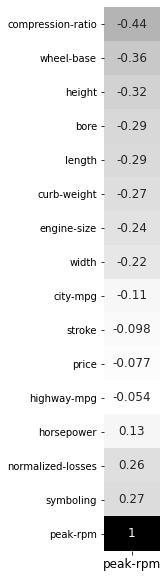

In [46]:
singlecorrtable('peak-rpm')

In [47]:
df.select_dtypes(include=['object']).columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [48]:
columns_reqd = df.select_dtypes(include=['object']).columns.tolist()
columns_reqd.append('peak-rpm')

In [49]:
df[df['peak-rpm'].isna()][columns_reqd].T

,130,131
make,renault,renault
fuel-type,gas,gas
aspiration,std,std
num-of-doors,four,two
body-style,wagon,hatchback
drive-wheels,fwd,fwd
engine-location,front,front
engine-type,ohc,ohc
num-of-cylinders,four,four
fuel-system,mpfi,mpfi


In [50]:
df.describe(include='object').T

,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94


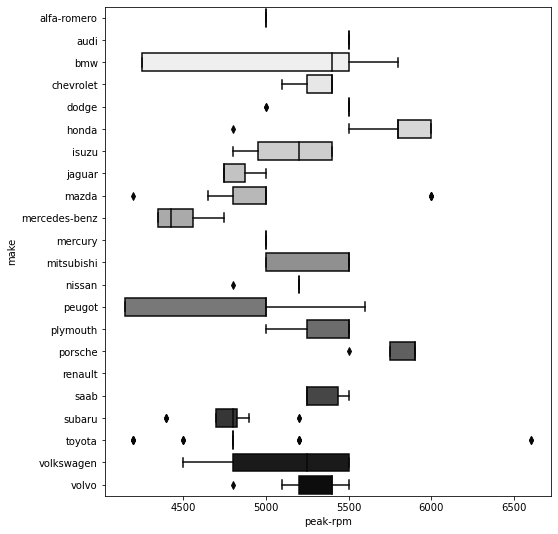

In [51]:
plt.figure(figsize = (8,9))
sns.boxplot(data=df, y='make', x='peak-rpm',palette='Greys');

In [52]:
numbers=['two','three','four','five','six','eight','twelve']

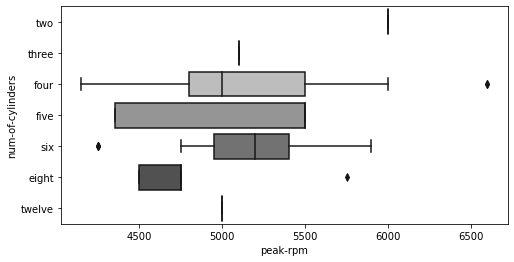

In [53]:
plt.figure(figsize = (8,4))
sns.boxplot(data=df, y='num-of-cylinders', x='peak-rpm',palette='Greys',order=numbers);

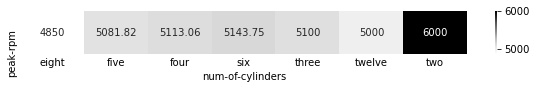

In [54]:
plt.figure(figsize=(10,0.8))
sns.heatmap(df.groupby('num-of-cylinders')[['peak-rpm']].mean().round(2).T, 
            annot=True, fmt='g', cmap='Greys', )
plt.tick_params(axis='both', which='both', length=0)

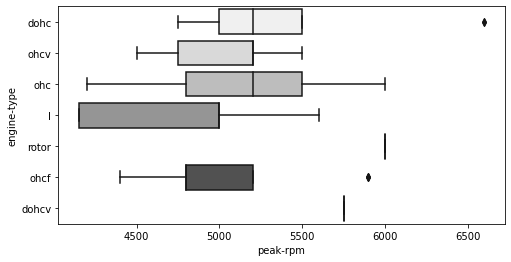

In [55]:
plt.figure(figsize = (8,4))
sns.boxplot(data=df, y='engine-type', x='peak-rpm',palette='Greys');

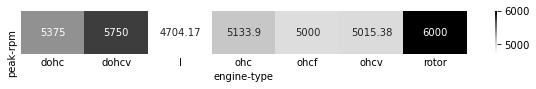

In [56]:
plt.figure(figsize=(10,0.8))
sns.heatmap(df.groupby('engine-type')[['peak-rpm']].mean().round(2).T, 
            annot=True, fmt='g', cmap='Greys', )
plt.tick_params(axis='both', which='both', length=0)

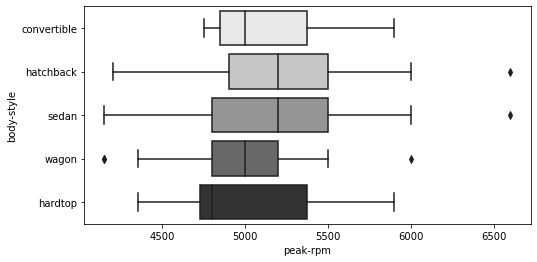

In [57]:
plt.figure(figsize = (8,4))
sns.boxplot(data=df, y='body-style', x='peak-rpm',palette='Greys');

In [58]:
df.groupby('body-style')[['peak-rpm']].mean().round(2).T

body-style,convertible,hardtop,hatchback,sedan,wagon
peak-rpm,5158.33,5031.25,5232.61,5081.77,5014.58


In [59]:
df.groupby('make')[['peak-rpm']].mean().round(2)

,peak-rpm
make,
alfa-romero,5000.00
audi,5500.00
bmw,5068.75
chevrolet,5300.00
dodge,5388.89
honda,5753.85
isuzu,5150.00
jaguar,4833.33
mazda,5108.82


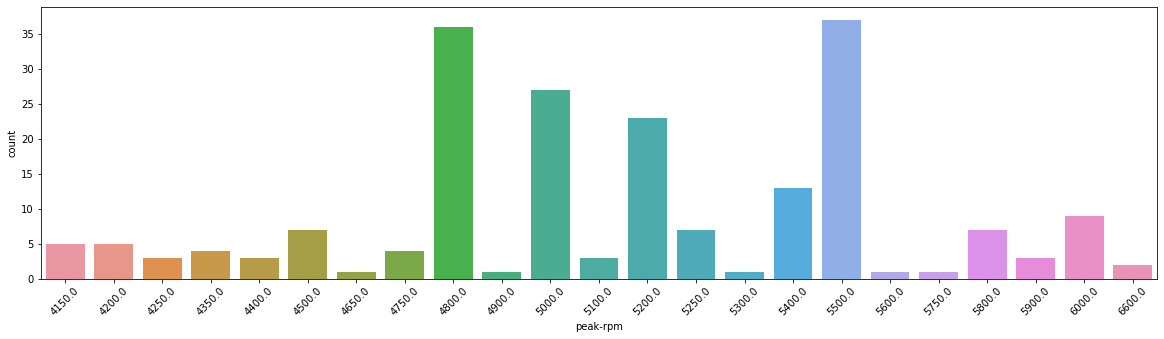

In [60]:
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='peak-rpm')
plt.xticks(rotation = 45);

In [61]:
df['peak-rpm'].fillna(5120, inplace = True)

In [62]:
for col in df:
    if df[col].isna().sum()>0: print(col,'\t', df[col].isna().sum())

normalized-losses 	 41


#### Imputing null values for normalized-losses

To do this, first I need to see which variable has a relation with normalized-values.  
For this, we will plot several graphs and analyze to understand the distribution better.

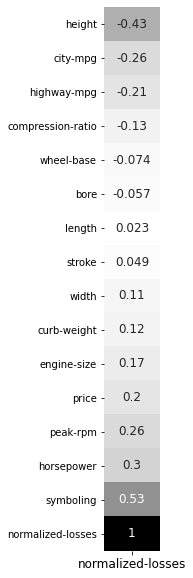

In [63]:
singlecorrtable('normalized-losses')

<AxesSubplot:>

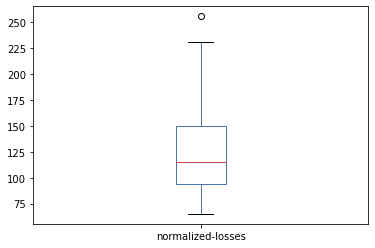

In [64]:
df['normalized-losses'].plot(kind = 'box')

Text(0.5, 1.0, 'Histogram of Normalized Losses')

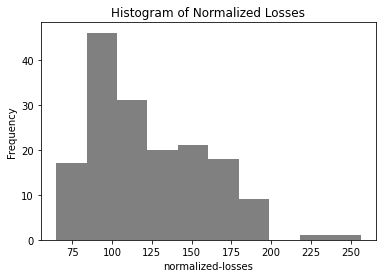

In [65]:
df['normalized-losses'].plot(kind = 'hist', color='grey')
plt.xlabel('normalized-losses')
plt.title('Histogram of Normalized Losses')

In [66]:
df[['normalized-losses']].groupby(by = df['make'], axis = 0).mean().round(1)

,normalized-losses
make,
alfa-romero,NaN
audi,161.0
bmw,190.0
chevrolet,100.0
dodge,133.4
honda,103.0
isuzu,NaN
jaguar,145.0
mazda,123.9


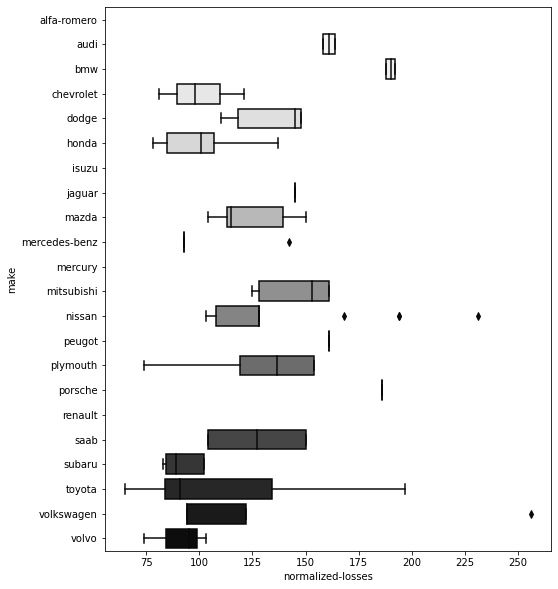

In [67]:
plt.figure(figsize = (8,10))
sns.boxplot(data=df, y='make', x='normalized-losses', palette='Greys');

In [68]:
df['normalized-losses']= df.groupby(df.make).transform(lambda x: x.fillna(x.mean()))
df[df['normalized-losses'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [69]:
for col in df:
    if df[col].isna().sum()>0: print(col, df[col].isna().sum())

Now that we have imputed all the missing values, and in the process have done EDA, we can move on to modelling.

## Machine Learning Model
####                    to predict Symboling

In order to proceed with machine learning, our first step is to check for multicollinearity if any.

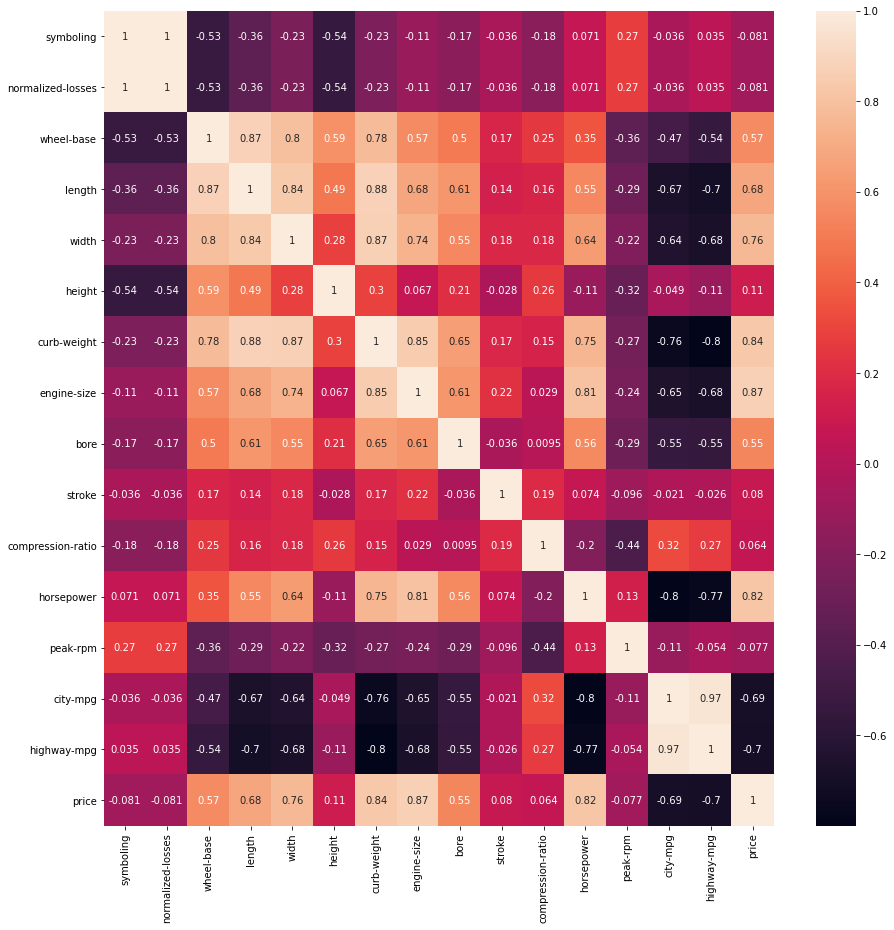

In [70]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot= True);

# End
# Thank You